## 1) Background / Theory

08:00-08:50 ~~ MORNING COFFEE & GREETS 

08:50-09:00 - Intro to the workshop [Davide Momi](https://scholar.google.com/citations?user=I-BACCgAAAAJ&hl=en&oi=ao)/[John Griffiths](https://scholar.google.com/citations?user=xwkt6aQAAAAJ&hl=en&oi=ao)<br>
09:00-09:45 - Intro to dynamics [Viktor Jirsa](https://scholar.google.com/citations?user=0ZVdLpMAAAAJ&hl=en) <br>
09:45-10:30 - Intro to connectivity [Joana Cabral](https://scholar.google.com/citations?user=v3ZEOeMAAAAJ&hl=en&oi=ao) <br>
10:30-11:15 - Intro to connectome-based neural mass modeling [Sorenza Bastiaens](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=Sorenza+Bastiaens&btnG=) <br>
11:15-12:15 - Hands-on Session 1 [Davide Momi](https://scholar.google.com/citations?user=I-BACCgAAAAJ&hl=en&oi=ao)/[John Griffiths](https://scholar.google.com/citations?user=xwkt6aQAAAAJ&hl=en&oi=ao)<br>

12:15-13:00 ~~ LUNCH 

In [27]:
!pip install mne
!pip install nilearn
!pip install nibabel
!pip install tvb-library
!pip install gdown
!pip install matplotlib
!pip install Pillow
!pip install seaborn
!pip install pandoc

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


In [13]:
import gdown
import warnings
warnings.filterwarnings('ignore')

file_id = "1xJfB8r0tbpnN5nHYund0hIRO2StZDUby?usp=sharing"
output = "./data"

gdown.download_folder(
    id=file_id,
    output=output)

Retrieving folder list


Processing file 1BRKO03B2KsNYqbUCOAJCDWn1R2Dw6mf- all_avg.mat_avg_high_epoched
Processing file 1qBoKEVQi7TCeABtvov6pq_dAu1Ef8-t5 JR_Model.png
Processing file 1r0MJfrCvlIqw-a4JevrCXeeEW0h7HDOs leadfield
Processing file 1Mu20EqYNsndgm3gTr8esGoSL_Y-7nORX Speakers_1.png
Building directory structure completed


Retrieving folder list completed
Building directory structure
Downloading...
From: https://drive.google.com/uc?id=1BRKO03B2KsNYqbUCOAJCDWn1R2Dw6mf-
To: C:\Users\davide_momi\Desktop\Dave\repo\OHBM-educational-course\course_contents\01_1_Background_Theory\data\all_avg.mat_avg_high_epoched
100%|██████████| 9.93M/9.93M [00:02<00:00, 4.23MB/s]
Downloading...
From: https://drive.google.com/uc?id=1qBoKEVQi7TCeABtvov6pq_dAu1Ef8-t5
To: C:\Users\davide_momi\Desktop\Dave\repo\OHBM-educational-course\course_contents\01_1_Background_Theory\data\JR_Model.png
100%|██████████| 4.82M/4.82M [00:01<00:00, 3.51MB/s]
Downloading...
From: https://drive.google.com/uc?id=1r0MJfrCvlIqw-a4JevrCXeeEW0h7HDOs
To: C:\Users\davide_momi\Desktop\Dave\repo\OHBM-educational-course\course_contents\01_1_Background_Theory\data\leadfield
100%|██████████| 49.8k/49.8k [00:00<00:00, 213kB/s]
Downloading...
From: https://drive.google.com/uc?id=1Mu20EqYNsndgm3gTr8esGoSL_Y-7nORX
To: C:\Users\davide_momi\Desktop\Dave\repo\OHBM-edu

['./data\\all_avg.mat_avg_high_epoched',
 './data\\JR_Model.png',
 './data\\leadfield',
 './data\\Speakers_1.png']

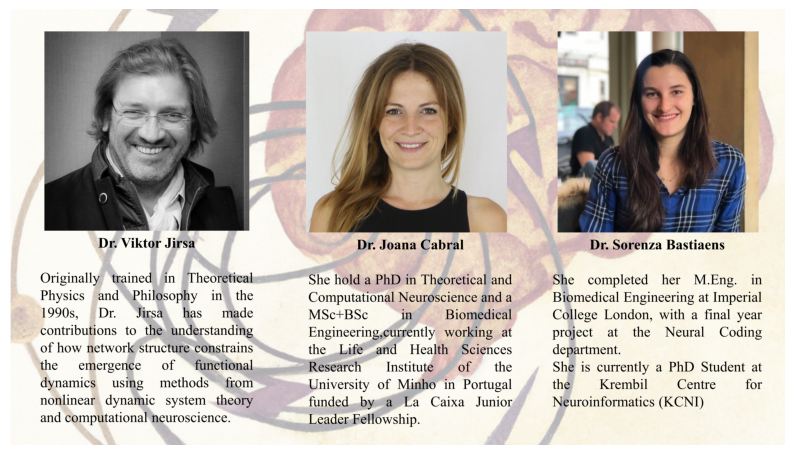

In [25]:
from PIL import Image
import matplotlib.pyplot as plt


# Path to the image file on Google Drive
image_path = './data/Speakers_1.png'

image_array = plt.imread(image_path)


# Plot the image using Matplotlib
plt.figure(figsize=(10, 10))  # Adjust the size as needed

plt.imshow(image_array)
plt.axis('off')  # Optional: Remove axes
plt.show()

-----

## Contents


[Overview](#overview)  
[Setup](#setup)  
[Neural mass model of local neural dynamics](#neural-mass-model-of-local-neural-dynamics)  
[Network model of whole-brain anatomical connectivity](#network-model-of-whole-brain-anatomical-connectivity)  
[Conclusions](#conclusions)  
[References](#references)

### Overview

This is the Hands-on Session #1 of the OHBM's Educational Course entitled "Whole-brain, Connectome-based Models of Brain Dynamics: From Principles to Applications"

In this tutorial we will cover some of the key components involved in computational modelling of mesoscopic, whole-brain network dynamics.

The paradigm we use for mathematically and computationally describing brain organization is called <b>connectome-based neural mass modelling</b>. 
Within this framework, the two main components of setting up a whole brain model are 

1) **node-level dynamics** and   
2) the large-scale **network topology**.  

We will examine each of these in term, for an exemplary neural mass model and brain network connectivity. 

This focus is on **resting** or 'steady-state' (as opposed to task- or stimulus-evoked) neural activity, at the relatively **fast timescales** measured by EEG, MEG, ECoG, LFP, etc. (as opposed to slower timescale signals seen in functional MRI). 

Demonstrations are done using a combination of pure-python code and simulations run using the [**The Virtual Brain Toolbox**](https://thevirtualbrain.org/tvb/zwei) who has the purpose of offering modern tools to the Neurosciences community, for computing, simulating and analyzing functional and structural data of human brains, brains modeled at the level of population of neurons. 


### Setup

If you are running this notebook in Google Colab, you will need to install some packages. If you are running in a more standard python environment, you need to ensure that these packages are installed externally (typically with `pip install <package>` on the command line).  

In [28]:
from scipy.signal import welch

import nilearn as nl
import nibabel as nib
from scipy.spatial.distance import cdist
import glob
import mne
import os.path as op
from scipy.stats import norm
from scipy import stats
from scipy import signal
from scipy.signal import welch
from scipy.optimize import fsolve
from scipy.io import loadmat
# Suppress warnings; keeps things cleaner
import warnings
warnings.filterwarnings('ignore')

# Standard scientific python import commands
import os,sys,glob,numpy as np,pandas as pd,seaborn as sns
sns.set_style('white')

%matplotlib inline
from matplotlib import pyplot as plt
import pickle

# TVB stuff
from tvb.simulator.lab import (models,connectivity,coupling,integrators,noise,simulator,
                              surfaces,region_mapping,monitors,equations,patterns,plot_pattern)

from nilearn.image import load_img
from nilearn import plotting as nplot
from nilearn import datasets


import math
from tvb.simulator import models
from ipywidgets import interactive
from ipywidgets import interact, FloatSlider, interactive_output, HBox, VBox


### Neural mass model of local neural dynamics

[*Jansen-Rit (1995)*](https://link.springer.com/article/10.1007/BF00199471) is a neural mass model that represents the macroscopic electrophysiological activity within a cortical column. This circuit consists of three interconnected neural populations: one for the pyramidal projection neuron and two for excitatory and inhibitory interneurons, forming two feedback loops.

In the model, each neural population is described with two operators: a rate-to-potential operator describing the dynamics between synapses and dendritic trees, and a potential-to-rate operator representing the output firing rate produced at the soma. The model is thus structured in two steps to describe the populations and capture the dynamics of the circuit.

The first step of the model involves transforming the average pulse density of action potentials received by the population into the average post-synaptic membrane potential. This step is known as the post-synaptic potential block and involves a linear transformation using an impulse response. The impulse response describes the dynamics between the synapses and dendritic trees:


 \begin{equation}
   h(t)=\alpha \beta te^{-\beta t}    \qquad \text{for t} > 0, 
 \end{equation}

The variable $\alpha$ is defined as the maximum amplitude of the postsynaptic potential and $\beta$ represent a sum of the reciprocal of the time constant of the passive membrane and all other spatially distributed delays present in the dendritic network, condensed into a single lumped term. For the excitatory  populations $\alpha$, $\beta$ correspond to $A, a$ respectively, and for the inhibitory population $\alpha$, $\beta$ are $B, b$.

 By convolving the incoming pulse with the impulse response, we can determine the relationship between the pulse rate and the corresponding membrane potential, and express it in the form of a second-order differential equation. 

The second step transforms the average membrane potential of the population into the average rate of action potentials fired by the neurons using a non-linear operator, and in this case, a sigmoid:

 \begin{equation}
     S(v)=\frac{2e_0}{1+e^{r(V_0-v)}}
 \end{equation}

with $e_{0}$ representing the maximum firing rate, $r$ denoting the variance of firing thresholds, and $V_{0}$ corresponding to the mean firing threshold.


It is the combination of those two steps that allows the representation of the coarse grained activity of each population in the model. This results in a model with a set of non-linear second-order differential equations that can be re-expressed as sets of first order non-linear ODEs:

\begin{eqnarray}
    \dot{y}_{0}(t) &=& y_{3}(t)\\
    \dot{y}_{3}(t) &=& AaS[y_{1}(t)-y_{2}(t)] - 2ay_{3}(t) - a^{2}y_{0}(t)\\
    \dot{y}_{1}(t) &=& y_{4}(t)\\
    \dot{y}_{4}(t) &=& Aa(p(t) + C_{2}S[C_{1}y_{0}(t)]) - 2ay_{4}(t) - a^{2}y_{1}(t)\\
    \dot{y}_{2}(t) &=& y_{5}(t)\\
    \dot{y}_{5}(t) &=& BbC_{4}S[C_{3}y_{0}] - 2by_{5}(t) - b^{2}y_{2}(t)
\end{eqnarray}


with $p(t)$ representing the external input to the system, and $C_i$ to the connectivity parameters (See below for graphical representation).

In summary, the Jansen-Rit model captures the dynamics of a local cortico-cortical circuit through a two-step process. It transforms the incoming pulse density into post-synaptic potentials using an impulse response, and then converts the impulse response into a set of differential equations to describe the neural activity of each population. This model provides insights into the complex interactions within the cortical circuitry and aids in understanding the neural dynamics observed in the brain. The output of the pyramidal postsynaptic potentials (y1-y2) is considered as the equivalent of an EEG signal. 

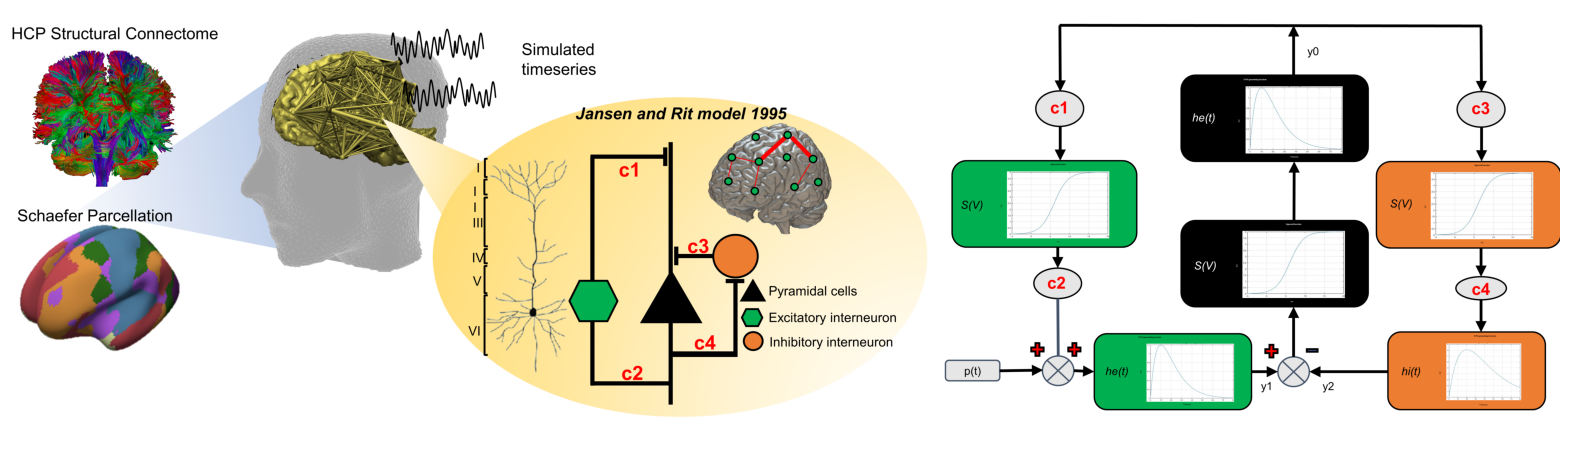

In [33]:
from PIL import Image
%matplotlib inline
# Path to the image file on Google Drive
image_path = './data/JR_Model.png'

image_array = plt.imread(image_path)


# Plot the image using Matplotlib
plt.figure(figsize=(20, 20))  # Adjust the size as needed

plt.imshow(image_array)
plt.axis('off')  # Optional: Remove axes
plt.show()



First we are gonna see the JR implementation in numpy 

\begin{equation}
Sigm(\nu) = \frac{2 \nu_{max}}{1 + \exp^{r(\nu_{0} - \nu)}}
\end{equation}

In [34]:
# JR Sigmoid function
def sigm(nu_max,v0,r,v):
  action_potential = (2*nu_max)/(1+math.exp(r*(v0-v)))
  return action_potential

def imp_Jansen(t,a,b):
  Exc = A*a*t*math.exp(-a*t)
  Inh = B*b*t*math.exp(-b*t)
  return Exc, Inh
def exc_imp_Jansen(t,a,A):
  Exc = A*a*t*math.exp(-a*t)
  return Exc

In [35]:
def plot_sigmoid(nu_max, v0, r):
    v_values = np.linspace(-10, 10, 100)
    action_potentials = [sigm(nu_max, v0, r, v) for v in v_values]

    plt.plot(v_values, action_potentials)
    plt.xlabel('v')
    plt.ylabel('Action Potential')
    plt.title('Sigmoid Function')
    plt.grid(True)
    plt.show()

# Define the interactive plot
interactive_plot = interactive(plot_sigmoid, nu_max=(0.1, 10.0), v0=(-10.0, 10.0), r=(0.1, 10.0))

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=5.05, description='nu_max', max=10.0, min=0.1), FloatSlider(value=0.0,…

In [36]:
def plot_exc_impulse_response(A, a):
    t_values = np.arange(0, 0.2, 0.001)
    Exc = [exc_imp_Jansen(t, a, A) for t in t_values]

    plt.plot(t_values, Exc)
    plt.xlabel('t')
    plt.ylabel('Excitatory Potential')
    plt.title('Impulse Response')
    plt.grid(True)
    plt.show()

# Define the interactive plot
interactive_plot = interactive(plot_exc_impulse_response, A = (0, 10.0), a=(50, 150))

# Display the interactive plot
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot


interactive(children=(FloatSlider(value=5.0, description='A', max=10.0), IntSlider(value=100, description='a',…

### Available parameters are:

$A$ = Maximum amplitude of EPSP [mV]. Also called average synaptic gain.

$B$ = Maximum amplitude of IPSP [mV]. Also called average synaptic gain.

$a$ = Reciprocal of the time constant of passive membrane and all other spatially distributed delays in the dendritic network [ms^-1]. Also called average synaptic time constant.

$b$ = Reciprocal of the time constant of passive membrane and all
other spatially distributed delays in the dendritic network [ms^-1].
Also called average synaptic time constant.

$v_0$ = Firing threshold (PSP) for which a 50% firing rate is achieved.In other words, it is the value of the average membrane potential corresponding to the inflection point of the sigmoid [mV]. The usual value for this parameter is 6.0.

$\nu_{max}$ = Determines the maximum firing rate of the neural population [s^-1].

$r$ = Steepness of the sigmoidal transformation [mV^-1].

$J$ = Average number of synapses between populations.

$a_1$ = Average probability of synaptic contacts in the feedback excitatory loop.

$a_2$ = Average probability of synaptic contacts in the slow feedback excitatory loop.

$a_3$ = Average probability of synaptic contacts in the feedback inhibitory loop.

$a_4$ = Average probability of synaptic contacts in the slow feedback inhibitory loop.

$p_{min}$ = Minimum input firing rate.

$p_{max}$ = Maximum input firing rate.

$\mu$ = Mean input firing rate

In [37]:
# Parameter settings
A = 3.25 
B = 22
C = 135
C1 = 1*C
C2 = 0.8*C  
C3 = 0.25*C 
C4 = 0.25*C
v0 = 6         # mV
tau_e = 10
tau_i = 20
a = (1/tau_e)*1000 # 100        # s^-1
b = (1/tau_i)*1000 # 50         # s^-1
nu_max = 2.5   # s^-1
r = 0.56       # mV^-1

# Simulation setting
start = 0.0
stim_time =10
dt = 1e-4
time_array = np.arange(start=start, stop=stim_time, step=dt)
vec_len = len(time_array)

# Input
noise = np.random.uniform(120,320,vec_len)
# Output Initialization
y = np.zeros((6,vec_len))

The equations of the Jansen-Rit model are the following:
\begin{equation}
\dot{y_{0}} = y_{3} \\
\dot{y_{3}} = Aa Sigm(y_{1} -  y_{2}) - 2a y_{3} - a^{2} y_{0} \\
\dot{y_{1}} = y_{4} \\
\dot{y_{4}} = Aa [p(t) + \alpha_2 J Sigm[\alpha_1 J y_0] + lrc + src] -2a y_{4} - a^{2} y_{1}\\
\dot{y_{2}} = y_{5} \\
\dot{y_5} = Bb (\alpha_4 J Sigm[\alpha_3 J y_{0}]) - 2b y_{5} - b^{2} y_{2} \\
\end{equation}


In [38]:
# Euler integration method to solve JR differential equations
for i in range (1,vec_len):
  y[0,i] = y[0,i-1] + y[3,i-1]*dt
  y[1,i] = y[1,i-1] + y[4,i-1]*dt
  y[2,i] = y[2,i-1] + y[5,i-1]*dt
  y[3,i] = y[3,i-1] + dt * (A*a*(sigm(nu_max,v0,r,(y[1,i-1]-y[2,i-1]))) - (2*a*y[3,i-1]) - (a**(2)*y[0,i-1]))
  y[4,i] = y[4,i-1] + dt * (A*a*(noise[i-1] + (C2*sigm(nu_max,v0,r,(C1*y[0,i-1])))) - (2*a*y[4,i-1]) - (a**(2)*y[1,i-1]))
  y[5,i] = y[5,i-1] + dt * (B*b*(C4*sigm(nu_max,v0,r,(C3*y[0,i-1]))) - (2*b*y[5,i-1]) - (b**(2)*y[2,i-1]))

output = y[1,:]-y[2,:]
X = signal.resample(output, 10000)
freqs_Jansen,ps_vPN_Jansen = welch(X,fs=100, noverlap = 125, nperseg=1000)

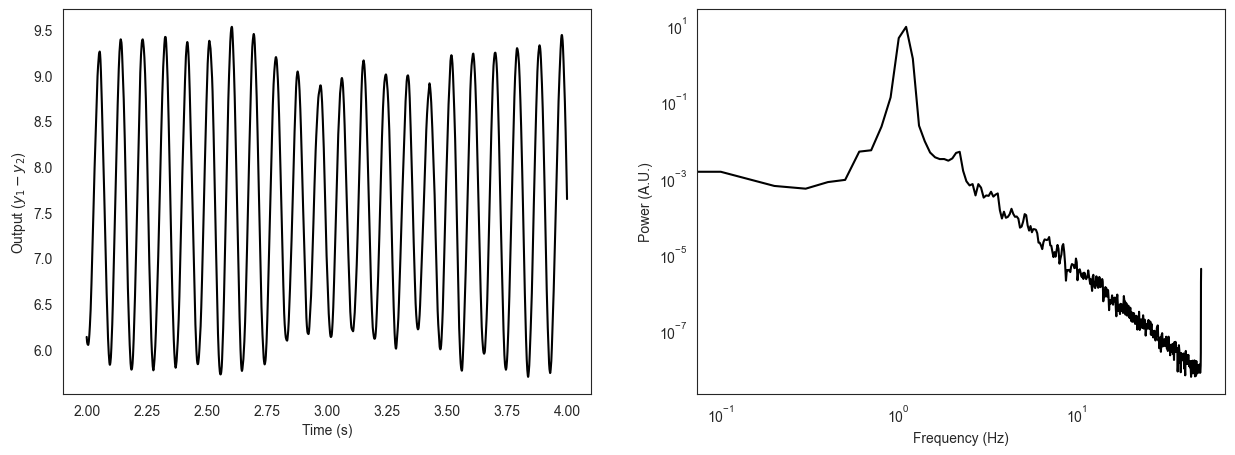

In [39]:
# Figures 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.plot(time_array[20000:40000],output[20000:40000], color='black')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Output ($y_{1}-y_{2}$)')
ax2.set_ylabel('Power (A.U.)')
ax2.plot(freqs_Jansen,ps_vPN_Jansen, color='black')

This can also be performed by tvb...

In [40]:
# Run JR single node in TVB

n_step = 50000
dt = 0.1

# Define initial conditions
initconds = np.array([-4.,-4.,-4.,-4.,-4.,-4.])[:,np.newaxis]

# fixed params for these examples : oscillatory
a= np.array([0.1])#[0.029])
mu = np.array([0.22])#0.1085])
b = np.array([0.05])
# Initialize model instance with fixed params
mod = models.JansenRit(v0=np.array([6.]), mu=mu, p_max=mu, p_min=mu, 
                       b = b, a =a)

# Execute single-node simulation run
time,dat = mod.stationary_trajectory(n_step=n_step,dt=dt)
y_0 = np.squeeze(dat[:,0,:,:])
y_1 = np.squeeze(dat[:,1,:,:])
y_2 = np.squeeze(dat[:,2,:,:])


freqs_Jansen_tvb,ps_vPN_Jansen_tvb = welch((y_1-y_2)[1000:],fs=1000, noverlap = 125, nperseg=1000)


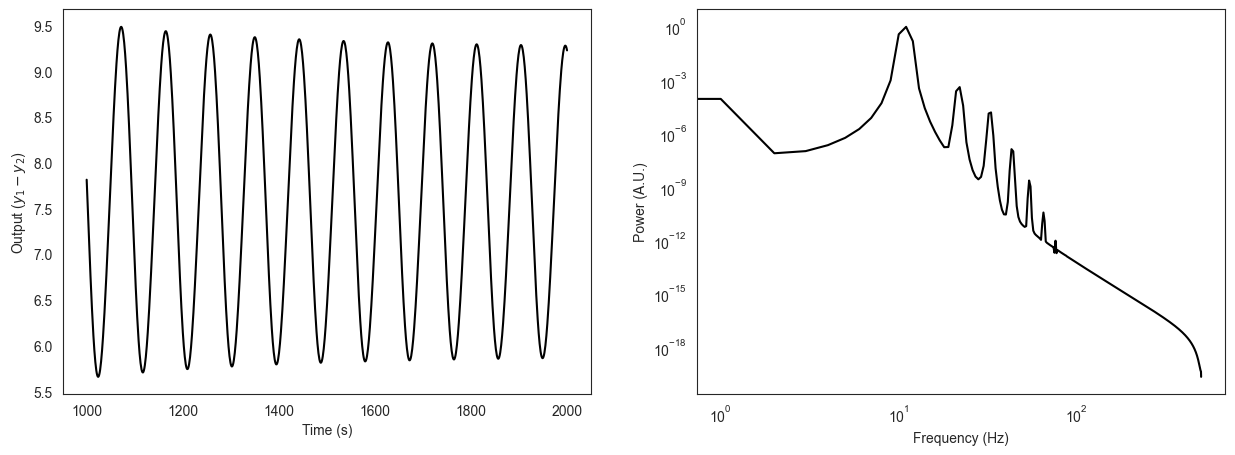

In [41]:
# Figures 


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax2.set_xscale("log")
ax2.set_yscale("log")
ax1.plot(time[1000:2000],(y_1-y_2)[1000:2000], color='black')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Output ($y_{1}-y_{2}$)')
ax2.set_ylabel('Power (A.U.)')
ax2.plot(freqs_Jansen_tvb,ps_vPN_Jansen_tvb, color='black')

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from ipywidgets import interactive, FloatSlider

# Define the parameter range for bifurcation diagram
mu_range = np.linspace(0.2, 0.8, 100)

def simulate_and_plot(mu):
    # Run JR single node in TVB
    n_step = 50000
    dt = 0.1

    # Define initial conditions
    initconds = np.array([-4., -4., -4., -4., -4., -4.])[:, np.newaxis]

    # fixed params for these examples: oscillatory
    a = np.array([0.1])
    b = np.array([0.05])

    # Initialize model instance with variable mu
    mod = models.JansenRit(v0=np.array([6.]), mu=np.array([mu]), p_max=np.array([mu]),
                           p_min=np.array([mu]), b=b, a=a)

    # Execute single-node simulation run
    time, dat = mod.stationary_trajectory(n_step=n_step, dt=dt)
    y_0 = np.squeeze(dat[:, 0, :, :])
    y_1 = np.squeeze(dat[:, 1, :, :])
    y_2 = np.squeeze(dat[:, 2, :, :])

    freqs_Jansen_tvb, ps_vPN_Jansen_tvb = welch((y_1 - y_2)[1000:], fs=1000, noverlap=125, nperseg=1000)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax2.set_xscale("log")
    ax2.set_yscale("log")
    ax1.plot(time[1000:2000], (y_1 - y_2)[1000:2000], color='black')
    ax1.set_xlabel('Time (s)')
    ax2.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('Output ($y_{1}-y_{2}$)')
    ax2.set_ylabel('Power (A.U.)')
    ax2.plot(freqs_Jansen_tvb, ps_vPN_Jansen_tvb, color='black')

# Create an interactive slider for the parameter mu
mu_slider = FloatSlider(min=0.2, max=100, step=0.01, value=0.5, description='mu')

# Define the interactive function
interactive_plot = interactive(simulate_and_plot, mu=mu_slider)

# Display the interactive plot
interactive_plot


interactive(children=(FloatSlider(value=0.5, description='mu', min=0.2, step=0.01), Output()), _dom_classes=('…

In [43]:
df_JR = pd.DataFrame([y_0[1000:2000],y_1[1000:2000], y_2[1000:2000]],
                     index=['y_0', 'y_1', 'y_2'], 
                     columns=time[1000:2000]).T

### Stability function

In [57]:
def differentiate_sigmoid(x, vmax, v0,  r):
  ds_dx = (r*2*vmax*(np.exp(r*(v0-x)))) / (1+np.exp(r*(v0-x)))**2
  return ds_dx

In [58]:
def stability_func(A,a):
  A = A
  B = 22
  C = 135
  c1 = 1*C
  c2 = 0.8*C  #0.8
  c3 = 0.25*C
  c4 = 0.25*C
  v0 = 6         # mV
  a = a        # s^-1
  b = 50         # s^-1
  nu_max = 2.5   # s^-1
  r = 0.56       # mV^-1
  divA = (A/a)
  divB = (B/b)
  p_all = np.arange(-20,400,1)
  #C3_all = np.arange(0.1,0.6,0.001)
  #c3 = C3_all*C
  #C4_all = np.arange(0.1,0.6,0.001)
  #c4 = C4_all*C
  y = np.random.rand(len(p_all))

  final_res = []
  for p in p_all:
    x = np.arange(-4,100,0.0001)
    y1 = x
    y2 = (divA*p) + (divA*c2*sigm(nu_max,v0,r,divA*c1*sigm(nu_max,v0,r,x))) - (divB*c4*sigm(nu_max,v0,r,divA*c3*sigm(nu_max,v0,r,x)))
    idx = np.argwhere(np.diff(np.sign(y1 - y2))).flatten()
    final_res.append(idx)

  new_values = []
  for i in range(0,len(final_res)):
    new_values.append(y1[final_res[i]])
  
  un = 0
  stability = []
  for j in range(0,len(new_values)):
      for me in range(0,len(new_values[j])):
        J = np.zeros((6, 6))
        fix_point = new_values[j][me]
        first_coordinate = (A/a)*sigm(nu_max,v0,r,fix_point)
        J[0, 3] = 1
        J[1, 4] = 1
        J[2, 5] = 1
        J[3, 0] = -a**2
        J[3,1] = A*a*differentiate_sigmoid(fix_point,vmax,v0,r)
        J[3,2] = -A*a*differentiate_sigmoid(fix_point,vmax,v0,r)
        J[3,3] = -2*a
        J[4, 0] = (A*a*c2*c1)*differentiate_sigmoid(c1*first_coordinate,vmax,v0,r)
        J[4, 1] = -a**2
        #J[4, 3] = -2*a
        J[4, 4] = -2*a
        J[5, 0] = (b*B*c4*c3)*differentiate_sigmoid(c3*first_coordinate,vmax,v0,r)
        J[5, 2] = -b**2
        J[5, 5] = -2*b
        evals = np.linalg.eigvals(J)
        evals
        stability_per = np.zeros(len(evals))
        for i in range(0,len(evals)):
          real_part = np.real(evals[i])
          if real_part > 0:
            un = 1
            stability_per[i] =un
          else:
            un = 0
            stability_per[i] = un
        value = np.zeros(len(new_values[j]))
        if stability_per.any()==1:
          value = 1
        else:
          value = 0
        stability.append(value)
  return p_all, new_values, stability

In [59]:
# def plot_stability(A, a):
#     #p_values = np.arange(0, 0.2, 0.001)
#     p_all, new_values, stability = stability_func(A,a)
#     w = [[p_all[i]] * len(new_values[i]) for i in range(len(new_values))]
#     index_unstable = np.where(np.array(stability)==1)

#     x_to_plot = [item for sublist in w for item in sublist]
#     y_to_plot = [item for sublist in new_values for item in sublist]
#     x_array = np.array(x_to_plot)
#     y_array = np.array(y_to_plot)
#     x_array[index_unstable]
#     plt.scatter(x_to_plot, y_to_plot)
#     plt.scatter(x_array[index_unstable], y_array[index_unstable], marker = "d")
#     plt.show()
# # Define the interactive plot
# interactive_plot = interactive(plot_stability, A = (0, 10.0), a=(50, 150))

# # Display the interactive plot
# output = interactive_plot.children[-1]
# output.layout.height = '350px'
# interactive_plot


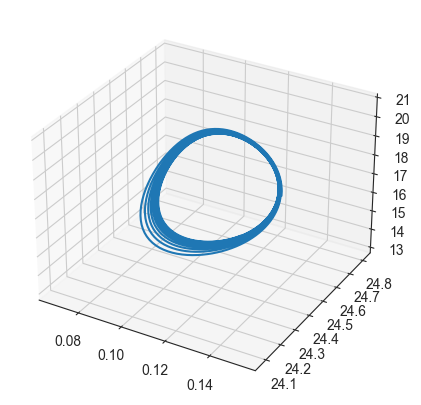

In [60]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the figure and axis objects
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(122, projection='3d')

# Calculate the limits for each dimension
zmax = df_JR.y_2.max() + df_JR.y_2.std() * 1.5
zmin = df_JR.y_2.min() - df_JR.y_2.std() * 1.5
ymax = df_JR.y_1.max() + df_JR.y_1.std() * 1.5
ymin = df_JR.y_1.min() - df_JR.y_1.std() * 1.5
xmax = df_JR.y_0.max() + df_JR.y_0.std() * 1.5
xmin = df_JR.y_0.min() - df_JR.y_0.std() * 1.5

# Plot the trajectory as a line
ax.plot(df_JR.y_0, df_JR.y_1, df_JR.y_2)

# Set the limits for each dimension
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_zlim(zmin, zmax)


# Show the plot
plt.show()




In [62]:
# fig, ax = plt.subplots(ncols=2, figsize=(12,3))

# # V and W vs. time
# df_VW.plot(ax=ax[0])

# # V vs. W trajectory
# ymax = df_VW.W.max() + df_VW.W.std()*1.5
# ymin = df_VW.W.min() - df_VW.W.std()*1.5
# xmax = df_VW.V.max() + df_VW.V.std()*1.5
# xmin = df_VW.V.min() - df_VW.V.std()*1.5
# df_VW.plot(x='V', y='W', legend=False,ax=ax[1],
#            xlim=[xmin,xmax],ylim=[ymin,ymax],alpha=0.5);



Bifurcation

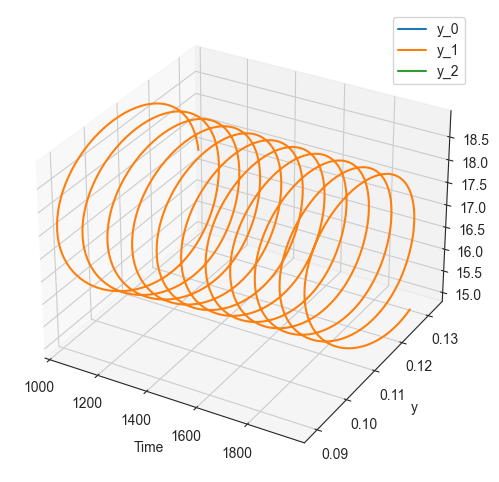

In [63]:
# df_JR = pd.DataFrame([y_0[1000:2000],y_1[1000:2000], y_2[1000:2000]],
#                      index=['y_0', 'y_1', 'y_2'], 
#                      columns=time[1000:2000]).T


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D trajectory
ax.plot3D(df_JR.index, df_JR['y_0'], df_JR['y_1'], label='y_0')
ax.plot3D(df_JR.index, df_JR['y_0'], df_JR['y_2'], label='y_1')
ax.plot3D(df_JR.index, df_JR['y_1'], df_JR['y_2'], label='y_2')

# Set the plot limits and labels
ax.set_xlim([df_JR.index .min(), df_JR.index .max()])
ax.set_ylim([df_JR['y_0'].min(),  df_JR['y_0'].max()])
ax.set_zlim([df_JR['y_2'].min(), df_JR['y_2'].max()])
ax.set_xlabel('Time')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Network model of whole-brain anatomical connectivity

In [64]:
# TVB stuff
from tvb.simulator.lab import (models,connectivity,coupling,integrators,noise,simulator,
                              surfaces,region_mapping,monitors,equations,patterns,plot_pattern)

In [65]:
!mkdir rois
parcel_dir = './rois/'
atlas_schaefer_2018 = datasets.fetch_atlas_schaefer_2018(n_rois=200, 
                                                         yeo_networks=7, 
                                                         resolution_mm=2, 
                                                         data_dir=parcel_dir)



Dataset created in ./rois/schaefer_2018



 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


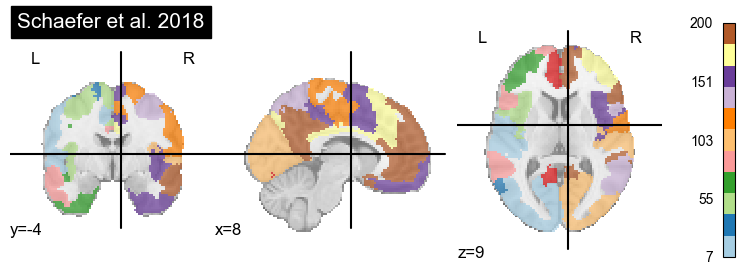

In [66]:
#Define where to slice the image
cut_coords = (8, -4, 9)
#Show a colorbar
colorbar=True
#Color scheme to show when viewing image
cmap='Paired'

#Plot the parcellation schema referred to by atlas_schaefer_2018
nplot.plot_roi(atlas_schaefer_2018['maps'], cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='Schaefer et al. 2018')

In [67]:
url = 'https://raw.githubusercontent.com/ThomasYeoLab/CBIG/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Centroid_coordinates/Schaefer2018_200Parcels_7Networks_order_FSLMNI152_2mm.Centroid_RAS.csv'
atlas = pd.read_csv(url)
label = atlas['ROI Name']

label_stripped = []

for xx in range(len(label)):
    label_stripped.append(label[xx].replace('7Networks_',''))


coords = np.array([atlas['R'], atlas['A'], atlas['S']]).T
conduction_velocity = 5 #in ms

distance = np.zeros((coords.shape[0], coords.shape[0]))

for roi1 in range(coords.shape[0]):
  for roi2 in range(coords.shape[0]):
    distance[roi1, roi2] = np.sqrt(np.sum((coords[roi1,:] - coords[roi2,:])**2, axis=0))
    distance[roi1, roi2] = np.sqrt(np.sum((coords[roi1,:] - coords[roi2,:])**2, axis=0))




**Structural Connectivity**

The structural connectivity (SC) scales the long-range connections between distant brain regions. Mathematically, together with the global scaling factor G, it is a factor of the long-range input onto a region.
In the simplest case, without time edelays, local connectivity and noise:
\begin{equation}
\dot{x}_i = N(x_{i}(t)) + G\sum_1^n SC_{ij} x_j
\end{equation}
Wherein $\dot{x}_i$ is the derivative of the date variable, $N(x_{i}(t))$ is the nerual mass model function, $G$ is the global scaling factor, $SC_{ij}$ is the connections strength between regions $i$ and $j$ and $x_j$ is the output from region $j$. 

Text(0.5, 1.0, 'Normalized count')

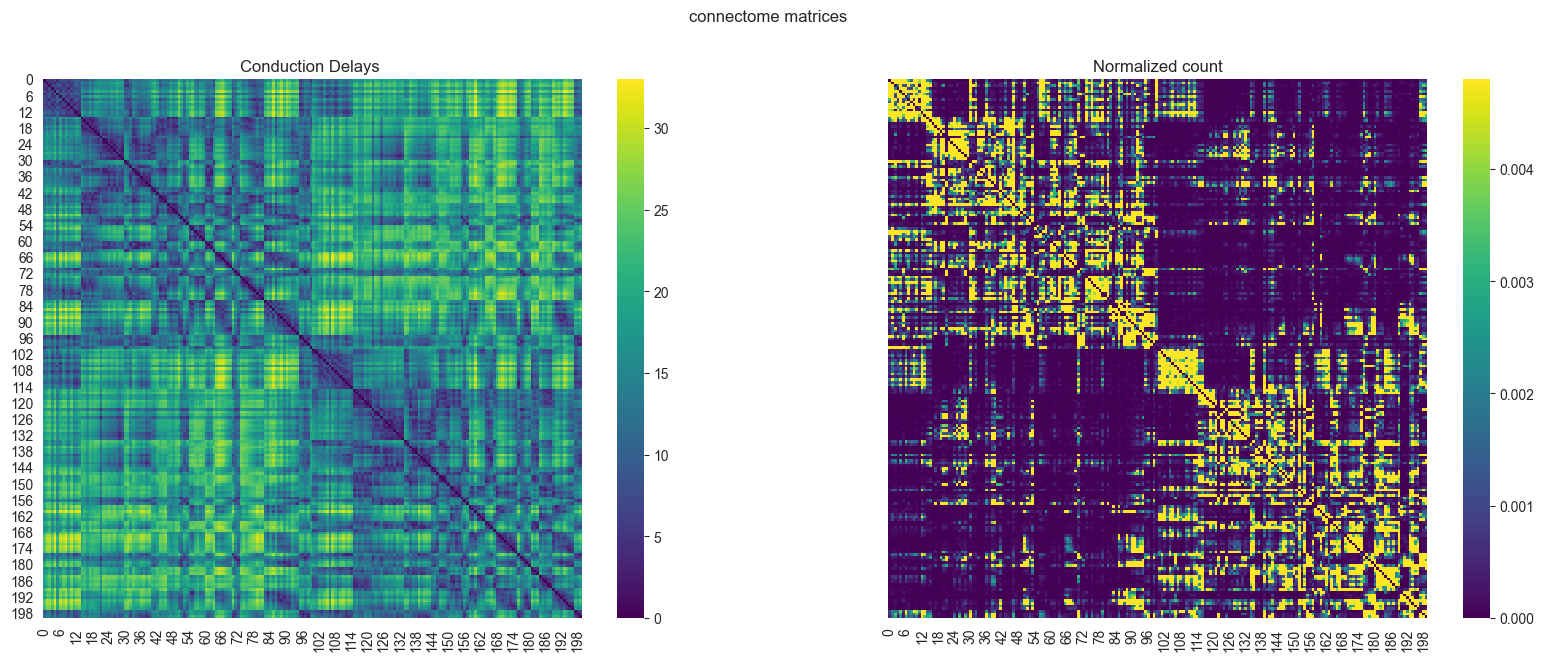

In [70]:
def NormalizeData(data):
         return (data - np.min(data)) / (np.max(data) - np.min(data))
    

url = "https://raw.githubusercontent.com/GriffithsLab/PyTepFit/main/data/Schaefer2018_200Parcels_7Networks_count.csv"
count = NormalizeData(np.array(pd.read_csv(url,  header=None, sep=' ')))

delays = distance/conduction_velocity

fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
fig.suptitle('connectome matrices')

# distance
sns.heatmap(delays, cmap='viridis', ax=axes.flat[0], square=True)
axes.flat[0].set_title('Conduction Delays ')
#axes.flat[0].set_xticklabels(label_stripped, rotation=90);
# axes.flat[0].set_yticklabels(label_stripped, rotation=0);

# wieghts (normalized between 0 and 3)
sns.heatmap(count, vmin=0.0, vmax=count.mean(), cmap='viridis', ax=axes.flat[1], square=True)
axes.flat[1].set_title('Normalized count')
#axes.flat[1].set_xticklabels(label_stripped, rotation=90)
# axes.flat[1].set_yticklabels(label_stripped, rotation=0)

In [71]:
conn = connectivity.Connectivity()
conn.weights = count
conn.region_labels = np.array(label_stripped)
conn.delays = delays
conn.centres = coords
conn.tract_lengths = distance


Schaefer_parcel = nl.image.load_img(atlas_schaefer_2018['maps']).get_fdata().flatten()


areas=[]
for value in range(1,np.unique(Schaefer_parcel).shape[0]):
    areas.append(np.where(Schaefer_parcel==value)[0].shape[0])
    
areas= np.array(areas)
conn.areas = areas
conn.number_of_connections = np.count_nonzero(conn.weights)

conn.cortical = np.broadcast_to(True, (conn.weights.shape[0]))
conn.orientations = np.zeros((conn.centres.shape))

conn.configure()

In [72]:
def simulate_resting_state(simlength=1000., tavg_per=1, conn=None, sigma=None, jrm_params=None, cpl_params=None, int_dt=0.5, speed=3.):
    # Define the connectivity
    if conn is None:
        conn = connectivity.Connectivity.from_file()  # Assuming you have a connectivity file or use load_default=True
        conn.speed = np.array([speed])
        conn.configure()

    # Define the model
    if jrm_params is None:
        jrm_params = dict(v0=np.array([6.]))
    else:
        jrm_params = {k: np.array([v]) for k, v in jrm_params.items()}
    jrm = models.JansenRit(**jrm_params)
    jrm.variables_of_interest = ('y0', 'y1', 'y2', 'y3', 'y4', 'y5')
    jrm.stvar = np.array([0, 1, 2, 3, 4, 5])

    # Set the noise
    if sigma is None:
        phi_n_scaling = (jrm.a * jrm.A * (jrm.p_max - jrm.p_min) * 0.5) ** 2 / 2.
        sigma = np.zeros(6)
        sigma[3] = phi_n_scaling * 1e-5  # Shrink noise by 1e-5

    # Define the coupling
    if cpl_params is None:
        cpl_params = dict(a=np.array(0.00045))
    else:
        cpl_params = {k: np.array([v]) for k, v in cpl_params.items()}
    cpl = coupling.SigmoidalJansenRit(**cpl_params)

    # Set up the integration scheme
    solver = integrators.HeunStochastic(dt=int_dt, noise=noise.Additive(nsig=sigma))

    # Define initial conditions
    init_conds = np.zeros([100, 6, conn.weights.shape[0], 1])  # All zeros; doesn't matter as we are using stochastic integration

    # Define the monitor for temporal averaging
    tavg_mon = monitors.TemporalAverage()
    tavg_mon.period = tavg_per

    # Create the simulator object
    sim = simulator.Simulator(
        model=jrm,
        connectivity=conn,
        coupling=cpl,
        integrator=solver,
        initial_conditions=init_conds,
        simulation_length=simlength,
        monitors=(tavg_mon,),
    ).configure()

    # Run the simulation and obtain the temporal average data
    tavg_data = sim.run()

    # Return the temporal average data
    return tavg_data


In [73]:
res = simulate_resting_state(simlength=5000, conn=conn,  sigma=None, jrm_params=None, 
                             cpl_params=None, int_dt=0.5, speed=3.)


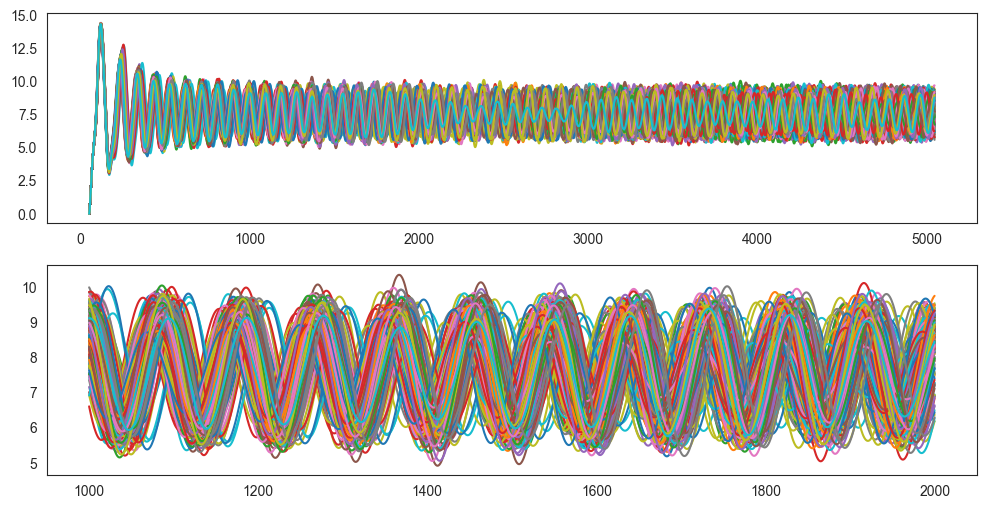

In [74]:
df_cPN = pd.DataFrame(np.squeeze(res[0][1][:,0,:]),index=res[0][0])
df_cPN.index.names = ['t']
df_cPN.columns.names = ['region']
df_cPN.columns = [label_stripped]

df_cEIN = pd.DataFrame(np.squeeze(res[0][1][:,1,:]),index=res[0][0])
df_cEIN.index.names = ['t']
df_cEIN.columns.names = ['region']
df_cEIN.columns = [label_stripped]

df_cIIN = pd.DataFrame(np.squeeze(res[0][1][:,2,:]),index=res[0][0])
df_cIIN.index.names = ['t']
df_cIIN.columns.names = ['region']
df_cIIN.columns = [label_stripped]

df_vPN = pd.DataFrame(np.squeeze(res[0][1][:,3,:]),index=res[0][0])
df_vPN.index.names = ['t']
df_vPN.columns.names = ['region']
df_vPN.columns = [label_stripped]

df_vEIN = pd.DataFrame(np.squeeze(res[0][1][:,4,:]),index=res[0][0])
df_vEIN.index.names = ['t']
df_vEIN.columns.names = ['region']
df_vEIN.columns = [label_stripped]

df_vIIN = pd.DataFrame(np.squeeze(res[0][1][:,5,:]),index=res[0][0])
df_vIIN.index.names = ['t']
df_vIIN.columns.names = ['region']
df_vIIN.columns = [label_stripped]


%matplotlib inline


df = df_cEIN - df_cIIN 

df.index = np.round(df.index,1)

fig, ax = plt.subplots(nrows=2, figsize=(12,6))

fig = ax[0].plot(df)
fig = ax[1].plot(df[1000:2000])

**Leadfield**

The leadfiled matrix is used to project local field potentials from region level (inside the brain) to the scalp surface for the calculation of EEG signals. 

$$M = GX + E$$

where $M \in \mathbb{R}^{C \times T}$ is the sensor data, $G \in \mathbb{R}^{C \times S}$ is the lead-field (or gain) matrix, $X \in \mathbb{R}^{S \times T}$ is the source time course (stc) and $E \in \mathbb{R}^{C \times T}$ is additive Gaussian noise with zero mean and identity covariance


Here, we use pre-calculated matrix. 

In [75]:
leadfield = np.load('./data/leadfield', allow_pickle=True)

epoched = mne.read_epochs('./data/all_avg.mat_avg_high_epoched')

for trial in range(epoched._data.shape[0]):
  epoched._data[trial,:,:] = np.array(leadfield @ df[2000:4000].T)

evoked = epoched.average()

Reading C:\Users\davide_momi\Desktop\Dave\repo\OHBM-educational-course\course_contents\01_1_Background_Theory\data\all_avg.mat_avg_high_epoched ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =   -1000.00 ...     999.00 ms
        0 CTF compensation matrices available
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


    Using multitaper spectrum estimation with 7 DPSS windows


[Text(0.5, 1.0, 'Multitaper PSD (eeg)'),
 Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Power Spectral Density (dB)')]

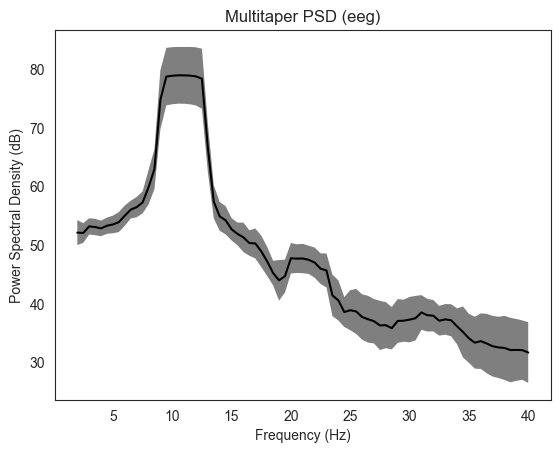

In [76]:
_, ax = plt.subplots()
spectrum = epoched.compute_psd(fmin=2.0, fmax=40.0, tmax=3.0, n_jobs=None)
# average across epochs first
mean_spectrum = spectrum.average()
psds, freqs = mean_spectrum.get_data(return_freqs=True)
# then convert to dB and take mean & standard deviation across channels
psds = 10 * np.log10(psds)
psds_mean = psds.mean(axis=0)
psds_std = psds.std(axis=0)

ax.plot(freqs, psds_mean, color="k")
ax.fill_between(
    freqs,
    psds_mean - psds_std,
    psds_mean + psds_std,
    color="k",
    alpha=0.5,
    edgecolor="none",
)
ax.set(
    title="Multitaper PSD (eeg)",
    xlabel="Frequency (Hz)",
    ylabel="Power Spectral Density (dB)",
)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Applying baseline correction (mode: logratio)


[Parallel(n_jobs=1)]: Done  62 out of  62 | elapsed:    2.4s finished


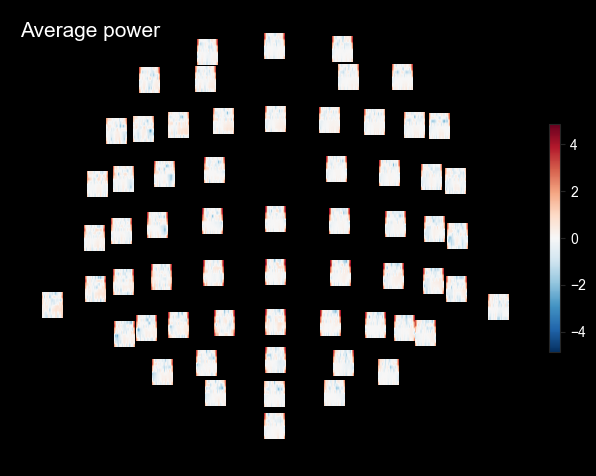

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No baseline correction applied


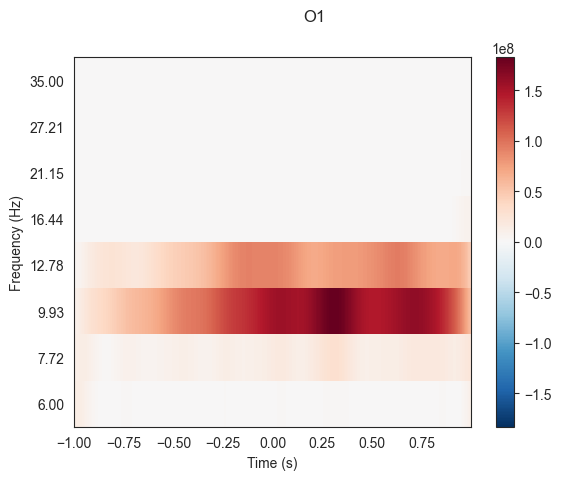

No baseline correction applied
No baseline correction applied


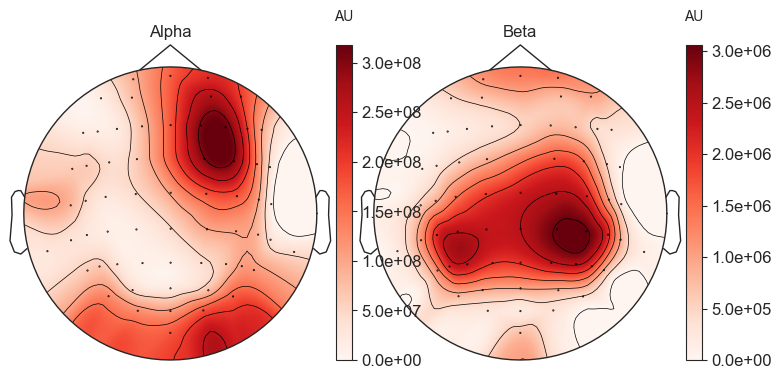

In [77]:
freqs = np.logspace(*np.log10([6, 35]), num=8)
n_cycles = freqs / 2.0  # different number of cycle per frequency
power, itc = mne.time_frequency.tfr_morlet(
    epoched,
    freqs=freqs,
    n_cycles=n_cycles,
    use_fft=True,
    return_itc=True,
    decim=3,
    n_jobs=None,
)


power.plot_topo(baseline=(-0.5, 0), mode="logratio", title="Average power")
power.plot([epoched.ch_names.index('O1')], 
           baseline=None, mode="logratio", 
           title=power.ch_names[epoched.ch_names.index('O1')])

fig, axes = plt.subplots(1, 2, figsize=(7, 4), constrained_layout=True)
topomap_kw = dict(
    ch_type="eeg", tmin=epoched.times[0], tmax=epoched.times[-1], baseline=None, mode="logratio", show=False
)
plot_dict = dict(Alpha=dict(fmin=8, fmax=12), Beta=dict(fmin=13, fmax=25))
for ax, (title, fmin_fmax) in zip(axes, plot_dict.items()):
    power.plot_topomap(**fmin_fmax, axes=ax, **topomap_kw)
    ax.set_title(title)

### Here we will add an external perturbation to show how we can simulated evoked activity

In [78]:
def run_sim(g2do_params,conn=None,
            sim_len = 2e3,dt = 0.5,
            tau = 2,lca=0.01,
            tavg_per = 1.0,
            stim_eqn_onset =None,
            stim_eqn_T = None,
            stim_eqn_tau = None,
            stim_weight = None, 
            leadfield = None):

    if conn == None:
        conn = connectivity.Connectivity(load_default=True)
    
    model = models.Generic2dOscillator(**g2do_params)
    cpl=coupling.Linear(a=np.array(lca))
    solver=integrators.HeunDeterministic(dt=0.1)
    mons=(monitors.TemporalAverage(period=tavg_per),)
    
    eqn_t = equations.PulseTrain()
    eqn_t.parameters['onset'] = stim_eqn_onset  
    eqn_t.parameters['T'] = stim_eqn_T
    eqn_t.parameters['tau'] = stim_eqn_tau

    weighting = stim_weight

    stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                    connectivity=conn,
                                    weight=weighting)
    stimulus.configure_space()
    stimulus.configure_time(np.arange(0., 3e3, 2**-4))
    
    sim = simulator.Simulator(model = model,connectivity=conn,coupling=cpl,
                            integrator=solver, 
                            monitors=mons,
                            stimulus=stimulus)
    sim.configure()

    (tavg_time, tavg_data), = sim.run(simulation_length=sim_len) 
    
    
    df_tavg = pd.DataFrame(np.squeeze(tavg_data),index=tavg_time)
    df_tavg.index.names = ['t']
    df_tavg.columns.names= ['node']
    df_tavg.columns = conn.region_labels 
    
    EEG = leadfield.dot(np.array(df_tavg).T).T # EEG shape [n_samples x n_eeg_channels]
    
    # reference is mean signal, tranposing because trailing dimension of arrays must agree 
    EEG = (EEG.T - EEG.mean(axis=1).T).T

    # analyze signal, get baseline and frequency
    eeg_baseline = EEG.mean(axis=0)
    EEG = EEG - EEG.mean(axis=0)  # center EEG

    plot_pattern(stimulus)
    
    return df_tavg, EEG

In [79]:
gamma_sp = 1.21
epsilon_sp =  12.3083

# is this the correct? 
# - units in Spiegler are S^-1. 
# - default value for g2do d is 0.02
# - so this gives 0.07674
eta_sp = np.array([(1/1000.) * 76.74])   #eta_sp = 76.74 # 1. # 76.74 ##1. # 76.74 # 1.

#eta_sp = np.array([0.2])

sp_g2do_params = dict(d = eta_sp,
                      tau = np.array(1.),
                      f = np.array(1.),
                      e = np.array(3.0), 
                      g = np.array(-gamma_sp),
                      alpha = np.array(2.), 
                      gamma = np.array(1.), 
                      c = np.array(0.),
                      b= np.array(-epsilon_sp), # should not be negative? LOOKS LIKE IT AL COMES DOWN TO THIS PARAM
                      beta = np.array(1.0),
                      a = np.array(0.))

In [80]:
SomMot = [index for index, word in enumerate(list(conn.region_labels)) if 'SomMot' in word]

stim_weights = np.zeros((conn.region_labels.shape[0]))
stim_weights[SomMot[:16]] = 0.5 #inject stimulus to left hemi


2023-06-12 11:22:09,243 - WARNING - tvb.simulator.integrators - random_state supplied for non-stochastic integration


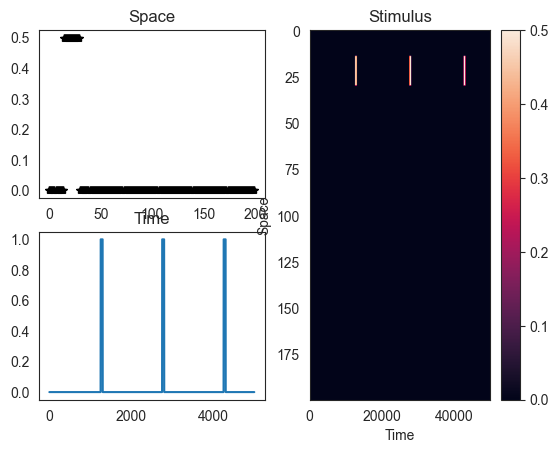

In [81]:
node2use = np.where(stim_weights!=0)[0]

stim_weighting = np.zeros(conn.region_labels.shape[0])
#stim_weighting[node2use] = 0.1

# configure stimulus spatial pattern
stim_weight = stim_weights[np.where(stim_weights!=0)[0]]
stim_weighting[np.where(stim_weights!=0)[0]] = stim_weight



df_tavg_sp1, EEG = run_sim(sp_g2do_params,conn=conn, lca=0.5,sim_len=5000, \
                      stim_eqn_onset =1250, stim_eqn_T = 1500.0, 
                      stim_eqn_tau = 50.0, \
                      stim_weight=stim_weighting, leadfield=leadfield)

(-0.05, 0.05)

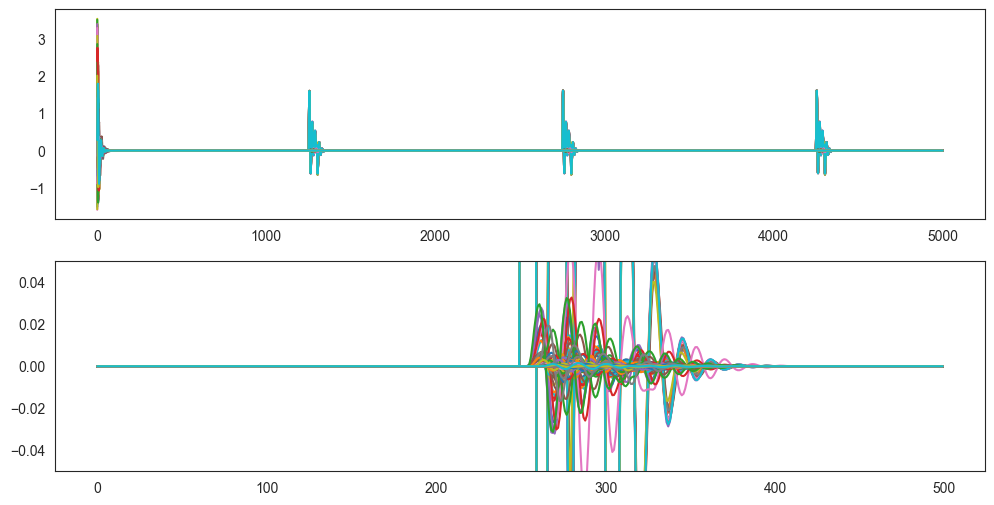

In [82]:
fig, ax = plt.subplots(nrows=2, figsize=(12,6))

fig = ax[0].plot(np.array(df_tavg_sp1))
fig = ax[1].plot(np.array(df_tavg_sp1)[1000:1500])
ax[1].set_ylim([-0.05, 0.05])

In [83]:
epoched = mne.read_epochs('./data/all_avg.mat_avg_high_epoched')

for trial in range(epoched._data.shape[0]):
  epoched._data[trial,:,:] = EEG[250:2250,:].T

evoked = epoched.average()

Reading C:\Users\davide_momi\Desktop\Dave\repo\OHBM-educational-course\course_contents\01_1_Background_Theory\data\all_avg.mat_avg_high_epoched ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 62) active
    Found the data of interest:
        t =   -1000.00 ...     999.00 ms
        0 CTF compensation matrices available
Not setting metadata
20 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


Projections have already been applied. Setting proj attribute to True.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


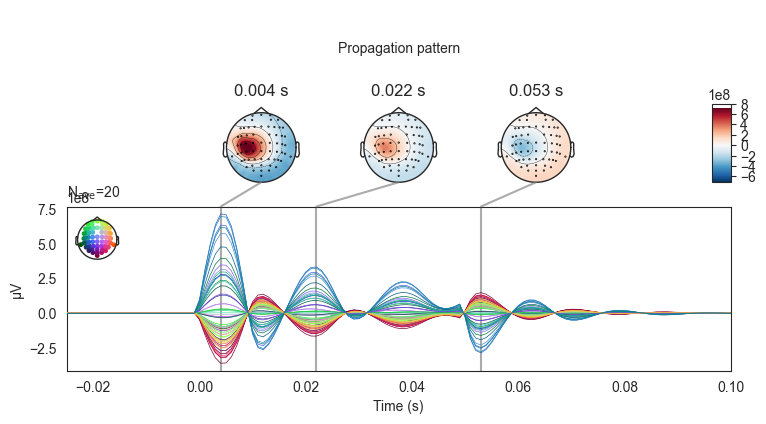

In [84]:
ts_args = dict(xlim=[-0.025,0.1])
ch, peak_locs1 = evoked.get_peak(ch_type='eeg', tmin=-0.005, tmax=0.004)
ch, peak_locs2 = evoked.get_peak(ch_type='eeg', tmin=0.008, tmax=0.1)
ch, peak_locs3 = evoked.get_peak(ch_type='eeg', tmin=0.030, tmax=0.1)
times = [peak_locs1, peak_locs2, peak_locs3]

evoked.plot_joint(ts_args=ts_args, times=times, title='Propagation pattern');

### Conclusions

### References


> Jansen, B.H. and Rit, V.G. (1995) **Electroencephalogram and visual evoked potential generation in a mathematical model of coupled cortical columns.** *Biological cybernetics*, 73(4), pp.357-366.    

> Da Silva, F.L., Hoeks, A., Smits, H. and Zetterberg, L.H. (1974). **Model of brain rhythmic activity.** *Kybernetik*, 15(1), pp.27-37.  

> David, O. and Friston, K.J. (2003) **A neural mass model for MEG/EEG: coupling and neuronal dynamics.** *NeuroImage*, 20(3), pp.1743-1755.  

> Spiegler, A., Knösche, T.R., Schwab, K., Haueisen, J. and Atay, F.M. (2011). **Modeling brain resonance phenomena using a neural mass model.** *PLoS Comput Biol*, 7(12), p.e1002298.

> Momi, D., Wang, Z., Griffiths, J.D. (2023). **TMS-Evoked Responses Are Driven by Recurrent Large-Scale Network Dynamics
.** *eLife*, 111, pp.385-430.  


#### For any question feel free to reach out:

***Dr. Davide Momi***<br/>
------------<br/>
Post-Doctoral Research Fellow<br/>
Whole Brain Modelling Group<br/>
Krembil Centre for Neuroinformatics - CAMH<br/>
250 College St., Toronto, ON M5T 1R8<br/>
<br/>
website: https://davi1990.github.io/<br/>
Twitter: @DaveMomi<br/>